<a href="https://colab.research.google.com/github/sidds4474/Play-Store-App-Review-Analysis/blob/main/Play_Store_App_Review_Analysis_Project_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Project**



## *Play Store App Review Analysis*



---



## The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.
## Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.
## Explore and analyze the data to discover key factors responsible for app engagement and success.



---



# **Use Case: Predict Rating of Play Store Applications**



---



# Data Collection

## **Let's Read our data**

In [361]:
# Mounting the google drive 

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [362]:
import pandas as pd

In [363]:
# Function to read data from google drive

def read_data(filename):
  data=pd.read_csv(filename)
  return data

In [364]:
# Reading the user Reviews file.

filename = '/content/drive/MyDrive/Play Store App Review Analysis - Capstone Project/User Reviews.csv'
data_review=read_data(filename)

# Using the head method to see the fiirst and last five rows of our data

data_review.head(-5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64285,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64286,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64287,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64288,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [365]:
# Reading the Play Store Data file.

filename = '/content/drive/MyDrive/Play Store App Review Analysis - Capstone Project/Play Store Data.csv'
data=read_data(filename)

# Using the head method to see the fiirst and last five rows of our data

data.head(-5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up


## Data Preparation and Cleaning

Data preparation is the process of cleaning and transforming raw data prior to processing and analysis. It is an important step prior to processing and often involves reformatting data, making corrections to data and the combining of data sets to enrich data. Data cleansing or data cleaning is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.

## **Data Information**

In [366]:
# Function ::get_stats to understand the data in more depth.

def get_stats(data):
  print('\n')
  print(data.info())
  print('\n')
  print('Shape of dataFrame is {} \n'.format(data.shape))
  print('\n')

# Does the dataframe contains any Nan values ?

  print('Missing Values are:\n')
  print(data.isnull().sum())
  print('\n')

# Checking the data type of all the columns :::

  print('Data Types of feature are: \n')
  print(data.dtypes)


In [367]:
get_stats(data)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


Shape of dataFrame is (10841, 13) 



Missing Values are:

App                  0
Category             0
Rating            1474
Reviews              0
Siz

In [368]:
print('Missing Values are:\n')
print(data.isnull().sum())

Missing Values are:

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


High Level Stats::

We have more than 1k+ missing values in Rating.

---
There's lot of dirtiness in this data as we can see size does not belong to object. It must belong to float or Integer

---


Checking whether we have any Invalid rating or not.





### **We can see that we have some missing values in the dataset. Lets have a detailed look of the Rating Column in the dataframe.**

In [369]:
# Checking if any rating has incoreect value. Range for rating is (1-5)

data[data['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


### Data placed wrong by 1 position. Shift the data in right hand side by 1 position

In [370]:
# Using shift method

data.iloc[10472,1:]=data.iloc[10472,1:].shift(1)

In [371]:
data.iloc[10472,:]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

## **Feature Engineering**

Last_Update column is a string data. ML Model works on numeric. Let's fetch year and month from this column and add as a seperate column

In [372]:
# Converting 'Last Updated' column from object to datetime data type.

data['Last Updated']=pd.to_datetime(data['Last Updated'])
data['Last Updated'].dtype

dtype('<M8[ns]')

In [373]:
data['Year Added']=data['Last Updated'].dt.year
data['Month Added']=data['Last Updated'].dt.month

In [374]:
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year Added,Month Added
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018,6
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018,6


In [375]:
data.tail(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year Added,Month Added
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,2017-07-25,1.48,4.1 and up,2017,7
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,2018-07-06,1.0,4.1 and up,2018,7
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,2017-01-20,1.0,2.2 and up,2017,1
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,2015,1
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,2018-07-25,Varies with device,Varies with device,2018,7


# **Exploratory Data Analysis**

### **Type of service people like to use Free or Paid ?**

In [376]:
# Getting the sum of all the  missing values
 
data['Type'].isna().sum()

1

In [377]:
# Dropping the value we got above which is 1.

data.dropna(subset=['Type'],inplace=True)

In [378]:
# checking again

data['Type'].isna().sum()

0

In [379]:
# Getting all the sub-categories in the Type Feature

data['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [380]:
# Count of Users using free or paid services

print(data['Type'].value_counts())

Free    10040
Paid      800
Name: Type, dtype: int64


In [381]:
# Stored Index and values

labels=data['Type'].value_counts().index

values=data['Type'].value_counts().values

In [382]:
# Installing plotly library

!pip install plotly

In [383]:
import plotly.express as px
import plotly.graph_objects as go

In [384]:
fig=px.pie(names=labels,values=values,title="Users Vs Apps (Free or Paid) Count", color_discrete_sequence=px.colors.sequential.RdBu)
fig.show(renderer="colab")

### **Analysing Free and paid apps over the years**

In [451]:
# Data frame wrt type free

df1=data[data['Type']=='Free']
df2=data[data['Type']=='Paid']

In [452]:
# Stats that we need. stored in free df.

free=df1['Year Added'].value_counts().reset_index()
free

,index,Year Added
0,2018,7004
1,2017,1684
2,2016,710
3,2015,377
4,2014,150
5,2013,81
6,2012,21
7,2011,12
8,2010,1


In [453]:
# Changing the name of columns

free.columns=['year','count']
free

,year,count
0,2018,7004
1,2017,1684
2,2016,710
3,2015,377
4,2014,150
5,2013,81
6,2012,21
7,2011,12
8,2010,1


In [454]:
paid=df2['Year Added'].value_counts().reset_index()

In [455]:
paid.columns=['year','count']
paid

,year,count
0,2018,345
1,2017,183
2,2016,94
3,2015,82
4,2014,59
5,2013,29
6,2012,5
7,2011,3


**In the above free df we have an extra 2010 year and count column but not in paid df. So we will append a row in paid df.**

In [456]:
# Creating a dict and append in paid df

row={'year':2010,'count':0}
paid=paid.append(row,ignore_index=True)
paid

,year,count
0,2018,345
1,2017,183
2,2016,94
3,2015,82
4,2014,59
5,2013,29
6,2012,5
7,2011,3
8,2010,0


### **Automating the visualisation step**

In [391]:
!pip install chart_studio

In [392]:
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import plotly.express as px
import chart_studio.plotly as py
import numpy as np
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)

In [393]:
# Automate the data frame process.

def stats(dataframe,feature,column1,column2):
  df=dataframe[feature].value_counts().reset_index()
  df.columns=[column1,column2]
  return df

In [394]:
# Calling our stats function using df1 

free=stats(df1,'Year Added','year','count')
free

,year,count
0,2018,7004
1,2017,1684
2,2016,710
3,2015,377
4,2014,150
5,2013,81
6,2012,21
7,2011,12
8,2010,1


In [395]:
# Calling our stats function using df1 

paid=stats(df2,'Year Added','year','count')
paid

,year,count
0,2018,345
1,2017,183
2,2016,94
3,2015,82
4,2014,59
5,2013,29
6,2012,5
7,2011,3


In [396]:
# Append the row missing in paid df

row={'year':2010,'count':0}

In [397]:
paid=paid.append(row,ignore_index=True)
paid

,year,count
0,2018,345
1,2017,183
2,2016,94
3,2015,82
4,2014,59
5,2013,29
6,2012,5
7,2011,3
8,2010,0


In [398]:
# Automate the data visual process.

def need_visual(df1=None,df2=None,column1=None,column2=None,dict_title=None,visual='scatter'):

  if visual=='scatter':

    trace1=go.Scatter(x=df1[column1],y=df1[column2])
    trace2=go.Scatter(x=df2[column1],y=df2[column2])
    y=[trace1,trace2]
    layout=dict_title
    fig=go.Figure(data=y,layout=layout)
    return fig.show(renderer="colab")

  elif visual=='bar': 
    
    fig=px.bar(df1,x=column1,y=column2) 
    return fig.show(renderer="colab")

In [399]:
# Calling our data visual function

need_visual(free,paid,'year','count',dict_title={'title':"App updated or added over the years",'xaxis':{'title':'Years'},'yaxis':{'title':'Count'}})

In [400]:
# See all the columns we have

df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Year Added', 'Month Added'],
      dtype='object')

### **In which month Free apps and Paid apps are added the most ?**


In [401]:
output1=stats(df1,'Month Added','month','count')
print(output1)

    month  count
0       7   3022
1       8   1511
2       6   1179
3       5    897
4       3    595
5       4    553
6       2    489
7       1    444
8      12    363
9      10    357
10     11    347
11      9    283


In [402]:

need_visual(df1=output1,column1='month',column2='count',visual='bar')

In [403]:
output2=stats(df2,'Month Added','month','count')
print(output2)

    month  count
0       7    141
1       6     93
2       8     83
3       5     81
4       3     72
5       4     63
6      12     63
7       1     47
8       2     45
9      10     41
10     11     40
11      9     31


In [404]:
need_visual(df1=output2,column1='month',column2='count',visual='bar')

### **Google is bias towards Free App or Paid App ?**

In [405]:
# Google is bias or not

output3=stats(df1,'Content Rating','users','count')
output4=stats(df2,'Content Rating','users','count')


In [406]:
print(output3)

             users  count
0         Everyone   8020
1             Teen   1156
2       Mature 17+    479
3     Everyone 10+    380
4  Adults only 18+      3
5          Unrated      2


In [407]:
print(output4)

          users  count
0      Everyone    695
1          Teen     52
2  Everyone 10+     33
3    Mature 17+     20


In [408]:
need_visual(output3,output4,'users','count',dict_title={'title':"Users Type VS Total Apps",'xaxis':{'title':'Users'},'yaxis':{'title':'Count'}})

### [**Analyse Distribution of Rating Feature**](https://)

In [409]:
df1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Year Added', 'Month Added'],
      dtype='object')

In [410]:
# We can see one value 1.9 in string format. Converting it to float.

df1['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 3.0, 1.9, 2.5, 2.8, 2.7,
       1.0, 2.9, 2.3, 2.6, 2.2, 1.7, 2.0, 2.4, 1.8, 1.6, 2.1, 1.4, 1.5,
       1.2, '1.9'], dtype=object)

In [411]:
# Converted to float

df1['Rating'].replace('1.9',1.9,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [412]:
# Data Type is float now

df1['Rating'].dtype

dtype('float64')

In [413]:
df1['Rating'].unique()


array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.6, 2.2, 1.7, 2. , 2.4, 1.8, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [414]:
# Missing Values. We will drop missing values

df1['Rating'].isna().sum()

1320

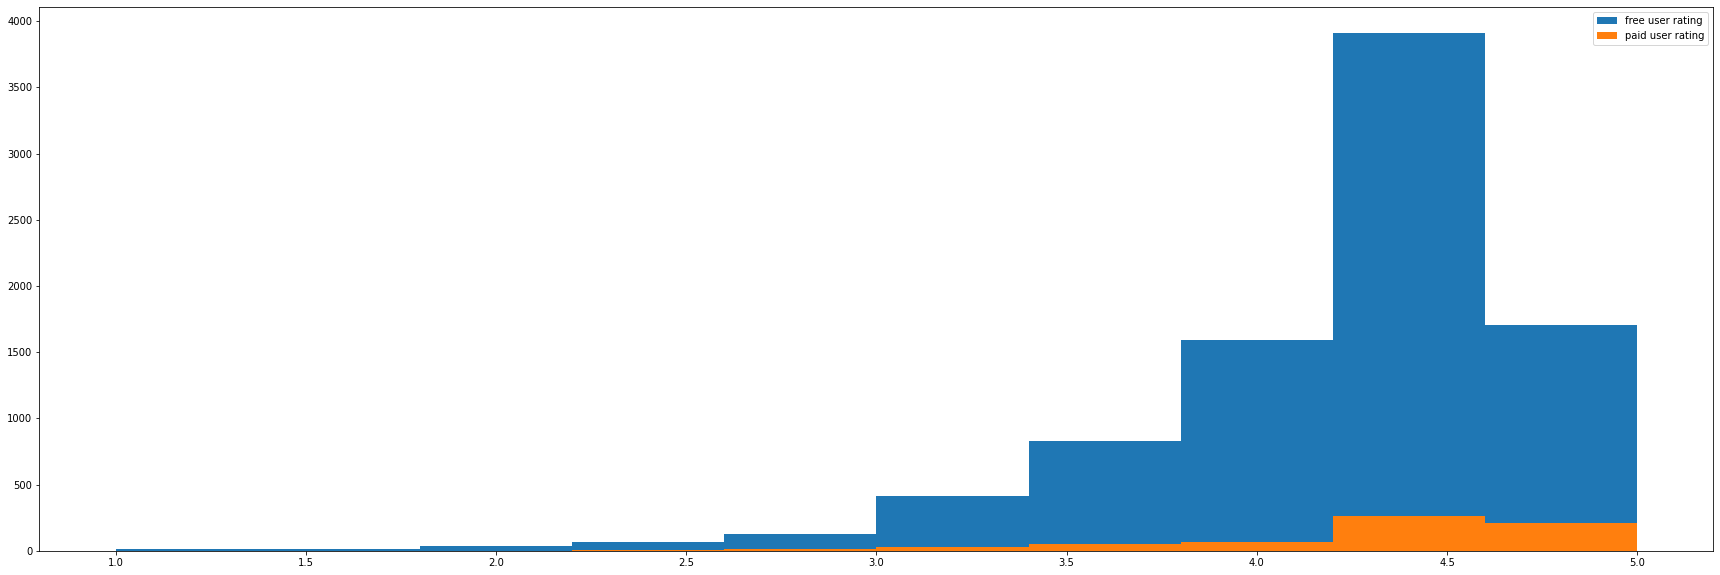

In [415]:
fig = plt.figure(figsize=(30, 10))  # size of hist

plt.hist(df1['Rating'].dropna(),label='free user rating')
plt.hist(df2['Rating'].dropna(),label='paid user rating')

plt.legend() #showing labels

We can see Most users rate the app \(free or paid)  in the range 4 - 4.5

In [416]:
output5=stats(df1,'Rating','ratings','count')

In [417]:
output6=stats(df2,'Rating','ratings','count')

In [418]:
need_visual(df1=output5,column1='ratings',column2='count',visual='bar')

In [419]:
need_visual(df1=output6,column1='ratings',column2='count',visual='bar')

### **Category Wise distribution Of Free and Paid Apps**

In [420]:
df1['Category'].unique()
#stats(df1,'Category').unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION', nan],
      dtype=object)

In [421]:
# Counting category wise total free apps
free_cat=stats(df1,'Category','categories','count').sort_values(by='categories')
free_cat

,categories,count
29,ART_AND_DESIGN,62
26,AUTO_AND_VEHICLES,82
32,BEAUTY,53
18,BOOKS_AND_REFERENCE,203
3,BUSINESS,446
30,COMICS,60
6,COMMUNICATION,360
17,DATING,227
20,EDUCATION,152
21,ENTERTAINMENT,147


In [422]:
# Counting category wise total paid apps
paid_cat=stats(df2,'Category','categories','count').sort_values(by='categories')
paid_cat

,categories,count
22,ART_AND_DESIGN,3
20,AUTO_AND_VEHICLES,3
6,BOOKS_AND_REFERENCE,28
13,BUSINESS,14
7,COMMUNICATION,27
16,DATING,7
18,EDUCATION,4
24,ENTERTAINMENT,2
29,EVENTS,1
0,FAMILY,191


In [457]:
# calling our visual function to create a graph

need_visual(free_cat,paid_cat,'categories','count')

#list1=df1['Category'].unique()
# print(list)
# list2=df1['Category'].value_counts()
# print(list2)

It can be seen from the above plot that maximum apps can be seen are under Family and Game Category and are also maximum are free.

In [424]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Year Added', 'Month Added'],
      dtype='object')

### **Exploring Android version and Installation of Apps**

In [459]:
# Counting free apps based on android version
free_android=stats(df1,'Android Ver','Android_versions','Total_apps').sort_values(by="Android_versions")
free_android

,Android_versions,Total_apps
27,1.0 and up,2
19,1.5 and up,14
13,1.6 and up,77
17,2.0 and up,26
26,2.0.1 and up,2
12,2.1 and up,107
31,2.2 - 7.1.1,1
11,2.2 and up,195
5,2.3 and up,580
8,2.3.3 and up,251


In [425]:
# Counting paid apps based on android version

paid_android=stats(df2,'Android Ver','Android_versions','Total_apps').sort_values(by="Android_versions")
paid_android

,Android_versions,Total_apps
16,1.5 and up,6
7,1.6 and up,39
17,2.0 and up,6
18,2.0.1 and up,5
11,2.1 and up,27
5,2.2 and up,49
3,2.3 and up,72
10,2.3.3 and up,30
8,3.0 and up,34
23,3.1 and up,1


In [458]:
need_visual(free_android,paid_android,'Android_versions','Total_apps')

In [427]:
df1['Installs']

0            10,000+
1           500,000+
2         5,000,000+
3        50,000,000+
4           100,000+
            ...     
10836         5,000+
10837           100+
10838         1,000+
10839         1,000+
10840    10,000,000+
Name: Installs, Length: 10040, dtype: object

In [428]:
# Counting free apps based on number of installs

install_free=stats(df1,'Installs','installs','count').sort_values(by='installs')
install_free

,installs,count
19,0+,4
18,1+,46
4,"1,000+",759
0,"1,000,000+",1555
17,"1,000,000,000+",58
11,10+,316
3,"10,000+",925
1,"10,000,000+",1249
6,100+,623
2,"100,000+",1079


In [429]:
# Counting paid apps based on number of installs

install_paid=stats(df2,'Installs','installs','count').sort_values(by='installs')
install_paid

,installs,count
13,0+,10
10,1+,21
0,"1,000+",149
9,"1,000,000+",24
4,10+,70
1,"10,000+",129
14,"10,000,000+",3
2,100+,96
3,"100,000+",90
12,5+,12


In [430]:
need_visual(install_free,install_paid,'installs','count')

It can be seen from the above plot that maximum apps have 1 million+ installs followed by 10 million. It can also be seen that paid are have less installs because of the price factor.

In [431]:
# Analyzing user Review Data

get_stats(data_review)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB
None


Shape of dataFrame is (64295, 5) 



Missing Values are:

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


Data Types of feature are: 

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object


In [432]:
# Calculating sentiments counts

labels_sentiment=data_review['Sentiment'].value_counts().index
values_sentiment=data_review['Sentiment'].value_counts().values

### **Visualising the App Reviews based on Sentiment**

In [460]:
import plotly.express as px

In [461]:
fig=px.pie(names=labels_sentiment,values=values_sentiment)

In [462]:
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20, hole=.6,marker=dict(line=dict(color='#000000', width=4,)))
fig.update_layout(annotations=[dict(text='APP REVIEWS', x=0.50, y=0.5, font_size=30, showarrow=False)])
fig.show(renderer="colab")

It can be seen from the above pie chart that 23,998 are positive reviews, followed by 8271 negative reviews given by user. 5163 reviews are neutral in nature.

In [463]:
## Counting sentiment wrt sentiment polarity

values=data_review['Sentiment_Polarity'].value_counts()
values

 0.000000    5163
 0.500000    1524
 0.700000     991
 1.000000     959
 0.800000     639
             ... 
-0.072024       1
 0.452000       1
 0.076190       1
-0.067256       1
 0.173333       1
Name: Sentiment_Polarity, Length: 5410, dtype: int64

### **Visualising the Sentiment Polarity wrt Positive Neutral and Negative Reviews**

In [437]:
df1=data_review[data_review['Sentiment_Polarity'] > 0]
df2=data_review[data_review['Sentiment_Polarity'] == 0]
df3=data_review[data_review['Sentiment_Polarity'] < 0]
print("Df1 is : ",df1)
print("Df2 is : ",df2)
print("Df3 is : ",df3)

Df1 is :                                    App  ... Sentiment_Subjectivity
0               10 Best Foods for You  ...               0.533333
1               10 Best Foods for You  ...               0.288462
3               10 Best Foods for You  ...               0.875000
4               10 Best Foods for You  ...               0.300000
5               10 Best Foods for You  ...               0.300000
...                               ...  ...                    ...
64217  Housing-Real Estate & Property  ...               0.550000
64221  Housing-Real Estate & Property  ...               0.259470
64222  Housing-Real Estate & Property  ...               0.486667
64223  Housing-Real Estate & Property  ...               0.447222
64227  Housing-Real Estate & Property  ...               1.000000

[23998 rows x 5 columns]
Df2 is :                                    App  ... Sentiment_Subjectivity
8               10 Best Foods for You  ...                    0.0
9               10 Best Foods 

In [438]:
import plotly.express as px

In [439]:
fig = px.density_heatmap(df1, x="Sentiment_Polarity", y="Sentiment")
fig.show(renderer='colab')

It can be seen from the above plot that Sentiment polarity greater than zero (positive review) and having high count is shown in yellow.


In [440]:
fig = px.density_heatmap(df2, x="Sentiment_Polarity", y="Sentiment")
fig.show(renderer='colab')


It can be seen from the above plot that Sentiment polarity greater equal to zero (Neutral review) and having count is shown in pink.


In [441]:
fig = px.density_heatmap(df3, x="Sentiment_Polarity", y="Sentiment")
fig.show(renderer='colab')


It can be seen from the above plot that Sentiment polarity less than zero (Negative review) and having high count is shown in yellow

## **Data Cleaning**

In [442]:
# Cleaning the Price column. Coverting the price from String to Float
# Just a step to show how data cleaning works after analyzing the data.

data['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [443]:
data[data['Price']=='$4.99']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year Added,Month Added
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up,2018,3
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up,2017,4
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,$4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up,2018,3
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,$4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up,2017,4
995,My Talking Pet,ENTERTAINMENT,4.6,6238,Varies with device,"100,000+",Paid,$4.99,Everyone,Entertainment,2018-06-30,Varies with device,Varies with device,2018,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10046,Advanced EX for MITSUBISHI,TOOLS,2.9,33,141k,"1,000+",Paid,$4.99,Everyone,Tools,2015-08-21,1.1,1.6 and up,2015,8
10047,Advanced EX for KIA,TOOLS,3.3,257,160k,"5,000+",Paid,$4.99,Everyone,Tools,2015-03-14,1.4,1.6 and up,2015,3
10050,Advanced EX for NISSAN,TOOLS,2.9,164,144k,"5,000+",Paid,$4.99,Everyone,Tools,2015-03-14,1.3,1.6 and up,2015,3
10051,Advanced EX for FIAT,TOOLS,3.5,138,141k,"5,000+",Paid,$4.99,Everyone,Tools,2015-03-05,1.6,1.6 and up,2015,3


In [444]:
def remove_dollar(x):
  if x=='0':
    return 0
  else:
    return x[1:]  

In [445]:
type(remove_dollar(data['Price'][0]))

int

In [446]:
dataframe=data.copy()

In [447]:
dataframe['Price']=dataframe['Price'].apply(remove_dollar)

In [448]:
dataframe['Price'].unique()

array([0, '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99', '3.49',
       '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00', '24.99',
       '11.99', '79.99', '16.99', '14.99', '1.00', '29.99', '12.99',
       '2.49', '10.99', '1.50', '19.99', '15.99', '33.99', '74.99',
       '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88', '25.99',
       '399.99', '17.99', '400.00', '3.02', '1.76', '4.84', '4.77',
       '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99', '299.99',
       '379.99', '37.99', '18.99', '389.99', '19.90', '8.49', '1.75',
       '14.00', '4.85', '46.99', '109.99', '154.99', '3.08', '2.59',
       '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04', '4.29',
       '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97', '200.00',
       '89.99', '2.56', '30.99', '3.61', '394.99', '1.26', '1.20', '1.04'],
      dtype=object)

In [449]:
dataframe['Price']=dataframe['Price'].astype(float)

In [450]:
dataframe['Price'].dtype

dtype('float64')

# **Conclusion**

---



### 1. This data set contains a large amount of data that can be used for various purposes.


### 2. Currently, the data visualisation made using this data set can be used for future developers and Google plays store team to glance at the google play store market and what categories of the apps should be made to keep google play store popular in the future. 



### 3. It can be used to improve business values and google play store in general. It is not just limited to the problem we solved.

### 4. Using this data set, we visualised various diffrent questions. We also discovered how different questions work in different cases.

### 5.   We found that graphs is easy to visualize and explains the implementation and it also saves computational power.

### 6.  Using this data set the future work includes the prediction of other parameters such as the number of reviews and installs , identifying the categories and statistics of the most installed apps, exploring the correlation between the size of the app and its version of Android, etc on the number of installs.